In [1]:
import pandas as pd # работа с таблицами 
import numpy as np # математические функции и матрицы
import matplotlib.pyplot as plt # графики
import seaborn as sns # еще более классные графики
import statsmodels.api as sm # стандартные регрессионные модели
import statsmodels.formula.api as smf # аналогичные модели с синтаксисом в стиле R
import statsmodels.graphics.gofplots as gf # визуализация моделей
import statsmodels.discrete.discrete_model # дискретные модели
from statsmodels.stats.outliers_influence import summary_table # работа с выбросами
from scipy.stats import shapiro # тест Шапиро – Уилка 

In [2]:
# При желании можем настроить графики по своему вкусу, изменив стиль и другие параметры шрифтов и графиков
# (https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)
plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=15)

In [3]:
# Импортируем данные о квартирах в Москве
data = pd.read_excel('/Users/polinapogorelova/Desktop/Метрика_ИП/Данные/dataflats.xlsx')

In [4]:
data

,A,B,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor
0,1,81.0,58,40,6.0,12.5,7,1,1,1
1,2,75.0,44,28,6.0,13.5,7,1,0,1
2,3,128.0,70,42,6.0,14.5,3,1,1,1
3,4,95.0,61,37,6.0,13.5,7,1,0,1
4,5,330.0,104,60,11.0,10.5,7,0,1,1
...,...,...,...,...,...,...,...,...,...,...
2035,2036,110.0,77,45,10.0,12.0,5,0,0,1
2036,2037,95.0,60,43,6.0,9.0,5,0,0,1
2037,2038,95.0,60,46,5.0,10.5,5,1,0,1
2038,2039,129.0,76,48,10.0,12.5,5,0,0,1


In [5]:
# Изменив название столбцов A и B на n (номер наблюдения) и price, соответственно
data.rename(columns={'A':'n', 'B': 'price'}, inplace=True)

In [6]:
# Удалим строки, в которых есть пропуск хотя бы для одного столбца
data.dropna(inplace=True)

In [7]:
# Добавим в набор данных новую переменную price_sq (стоимость 1 кв м квартиры в Москве)
data['price_sq'] = data['price']/data['totsp']

In [8]:
data

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,price_sq
0,1,81.0,58,40,6.0,12.5,7,1,1,1,1.396552
1,2,75.0,44,28,6.0,13.5,7,1,0,1,1.704545
2,3,128.0,70,42,6.0,14.5,3,1,1,1,1.828571
3,4,95.0,61,37,6.0,13.5,7,1,0,1,1.557377
4,5,330.0,104,60,11.0,10.5,7,0,1,1,3.173077
...,...,...,...,...,...,...,...,...,...,...,...
2035,2036,110.0,77,45,10.0,12.0,5,0,0,1,1.428571
2036,2037,95.0,60,43,6.0,9.0,5,0,0,1,1.583333
2037,2038,95.0,60,46,5.0,10.5,5,1,0,1,1.583333
2038,2039,129.0,76,48,10.0,12.5,5,0,0,1,1.697368


In [9]:
# С помощью МНК оценим модель регрессии для стоимости 1 кв м квартиры, используя в качестве объясянющих переменных 
# livesp (жилая площадь) и dist (расстояние до центра в км)
ols_1 = smf.ols('price_sq ~ livesp + dist', data=data).fit()
ols_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price_sq   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     393.7
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          2.94e-145
Time:                        12:19:01   Log-Likelihood:                -717.45
No. Observations:                2038   AIC:                             1441.
Df Residuals:                    2035   BIC:                             1458.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5395      0.057     26.994      0.000       1.428       1.651
livesp         0.0149      0.001     15.117      0.000       0.013       0.017
dist          -0.0465      0.002    -20.177      0.000      -0.051      -0.042
==============================================================================
Omnibus:                      806.418   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6015.853
Skew:                           1.676   Prob(JB):                         0.00
Kurtosis:                      10.721   Cond. No.                         361.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Спрогнозируем модельные значения для имеющихся наблюдений
data['yhat'] = ols_1.fittedvalues

In [11]:
data

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,price_sq,yhat
0,1,81.0,58,40,6.0,12.5,7,1,1,1,1.396552,1.554726
1,2,75.0,44,28,6.0,13.5,7,1,0,1,1.704545,1.329234
2,3,128.0,70,42,6.0,14.5,3,1,1,1,1.828571,1.491539
3,4,95.0,61,37,6.0,13.5,7,1,0,1,1.557377,1.463471
4,5,330.0,104,60,11.0,10.5,7,0,1,1,3.173077,1.946048
...,...,...,...,...,...,...,...,...,...,...,...,...
2035,2036,110.0,77,45,10.0,12.0,5,0,0,1,1.428571,1.652556
2036,2037,95.0,60,43,6.0,9.0,5,0,0,1,1.583333,1.762252
2037,2038,95.0,60,46,5.0,10.5,5,1,0,1,1.583333,1.737235
2038,2039,129.0,76,48,10.0,12.5,5,0,0,1,1.697368,1.674048


In [12]:
# С помощью МНК оценим альтернативную модель регрессии, включив дополнительно переменную metrdist 
# (расстояние до ближайшей станции метро (в минутах))
ols_2 = smf.ols('price_sq ~ livesp + dist + metrdist', data=data).fit()
print(ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:               price_sq   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     293.6
Date:                Mon, 17 Oct 2022   Prob (F-statistic):          2.46e-158
Time:                        12:19:03   Log-Likelihood:                -684.12
No. Observations:                2038   AIC:                             1376.
Df Residuals:                    2034   BIC:                             1399.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6653      0.058     28.629      0.0

In [13]:
# Посчитаем прогнозные значения
data['yhat2'] = ols_2.fittedvalues

In [14]:
data

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,price_sq,yhat,yhat2
0,1,81.0,58,40,6.0,12.5,7,1,1,1,1.396552,1.554726,1.577113
1,2,75.0,44,28,6.0,13.5,7,1,0,1,1.704545,1.329234,1.356566
2,3,128.0,70,42,6.0,14.5,3,1,1,1,1.828571,1.491539,1.581822
3,4,95.0,61,37,6.0,13.5,7,1,0,1,1.557377,1.463471,1.488366
4,5,330.0,104,60,11.0,10.5,7,0,1,1,3.173077,1.946048,1.959629
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,2036,110.0,77,45,10.0,12.0,5,0,0,1,1.428571,1.652556,1.705265
2036,2037,95.0,60,43,6.0,9.0,5,0,0,1,1.583333,1.762252,1.810417
2037,2038,95.0,60,46,5.0,10.5,5,1,0,1,1.583333,1.737235,1.787130
2038,2039,129.0,76,48,10.0,12.5,5,0,0,1,1.697368,1.674048,1.726792


In [15]:
# Построим 90%-й доверительные интервалы для оценок коэффициентов моделей ols_1 и ols_2
print(ols_1.conf_int(alpha = 0.1))
print(ols_2.conf_int(alpha = 0.1))

                  0         1
Intercept  1.445626  1.633324
livesp     0.013292  0.016539
dist      -0.050302 -0.042716
                  0         1
Intercept  1.569613  1.761058
livesp     0.013046  0.016243
dist      -0.048561 -0.041066
metrdist  -0.019516 -0.013008


In [27]:
# Проверим гипотезу о равенстве коэффициента при регрессоре dist -0.1 в моделях ols_1 и ols_2
hypotheses = '(dist = -0.1)' # формулируем гипотезу H_0
print(ols_1.f_test(r_matrix = hypotheses)) # тестируем гипотезу с помощью F-теста
print(ols_2.f_test(r_matrix = hypotheses)) # тестируем гипотезу с помощью F-теста

<F test: F=array([[538.53546841]]), p=6.859863066294954e-106, df_denom=2.04e+03, df_num=1>
<F test: F=array([[587.12704297]]), p=3.650897547863692e-114, df_denom=2.03e+03, df_num=1>


In [19]:
# Проверим гипотезу вида: livesp+dist=0
hypotheses = '(livesp+dist=0)' # формулируем гипотезу H_0
print(ols_1.f_test(r_matrix = hypotheses)) # тестируем гипотезу с помощью F-теста
print(ols_2.f_test(r_matrix = hypotheses)) # тестируем гипотезу с помощью F-теста

<F test: F=array([[138.87082475]]), p=4.686108267182074e-31, df_denom=2.04e+03, df_num=1>
<F test: F=array([[130.21478616]]), p=2.800332329425247e-29, df_denom=2.03e+03, df_num=1>


In [19]:
# Проверим гипотезу вида: 2*livesp+metrdist=0
hypotheses = '(2*livesp+metrdist=0)' # формулируем гипотезу H_0
print(ols_2.f_test(r_matrix = hypotheses)) # тестируем гипотезу с помощью F-теста

<F test: F=array([[21.35721064]]), p=4.050825141903661e-06, df_denom=2.03e+03, df_num=1>


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scale=data.copy()
data_scale=pd.DataFrame(scaler.fit_transform(data_scale), columns=data_scale.columns)
data_scale

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,price_sq,yhat
0,-1.734057,-0.896179,-0.999273,-0.803102,-1.042635,0.440190,-0.292507,0.676607,1.448194,0.514833,-0.794058,-0.764332
1,-1.732358,-1.011871,-1.927887,-2.324690,-1.042635,0.736412,-0.292507,0.676607,-0.690515,0.514833,-0.033961,-1.817944
2,-1.730658,0.010076,-0.203317,-0.549504,-1.042635,1.032634,-1.340648,0.676607,1.448194,0.514833,0.272123,-1.059574
3,-1.728959,-0.626231,-0.800284,-1.183499,-1.042635,0.736412,-0.292507,0.676607,-0.690515,0.514833,-0.397157,-1.190719
4,-1.727260,3.905046,2.051889,1.732879,0.758424,-0.152253,-0.292507,-1.477963,1.448194,0.514833,3.590225,1.064124
...,...,...,...,...,...,...,...,...,...,...,...,...
2033,1.724146,-0.337000,0.260990,-0.169107,0.398213,0.292079,-0.816578,-1.477963,-0.690515,0.514833,-0.715036,-0.307218
2034,1.725845,-0.626231,-0.866613,-0.422705,-1.042635,-0.596586,-0.816578,-1.477963,-0.690515,0.514833,-0.333100,0.205336
2035,1.727545,-0.626231,-0.866613,-0.042308,-1.402847,-0.152253,-0.816578,0.676607,-0.690515,0.514833,-0.333100,0.088442
2036,1.729244,0.029358,0.194660,0.211290,0.398213,0.440190,-0.816578,-1.477963,-0.690515,0.514833,-0.051673,-0.206800


In [21]:
# Оценим модель регрессии ols_2 для стандартизированных показателей
ols_2_scale = smf.ols('price_sq ~ livesp + dist + metrdist', data=data_scale).fit()
print(ols_2_scale.summary())

                            OLS Regression Results                            
Dep. Variable:               price_sq   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     293.6
Date:                Sun, 16 Oct 2022   Prob (F-statistic):          2.46e-158
Time:                        14:11:32   Log-Likelihood:                -2525.2
No. Observations:                2038   AIC:                             5058.
Df Residuals:                    2034   BIC:                             5081.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.839e-16      0.019  -9.93e-15      1.0

In [ ]:
# Проверим гипотезу о равенстве коэффициента при регрессоре dist -0.1 в модели и ols_2 против правосторонней альтернативы (alpha=0.05)
# Рассчитаем критическое значение
from scipy.stats import t

t_cr = t.ppf(0.95, 2035)
print(t_cr)

# Рассчитаем наблюдаемое значение t-статистики
t = (-0.0448+0.1)/0.002
print(t)

In [24]:
import random
random.seed(7)
new_data = np.random.multivariate_normal(mean=[30,10,5], cov=[[16,0,0],[0,4,0],[0,0,4]], size=10).reshape(10,3)

In [25]:
new_data

array([[26.50305371, 10.34342347,  4.39816738],
       [26.35877164, 12.27299312,  4.65998439],
       [31.54585838, 10.38946002,  4.56130376],
       [27.01576646, 11.43124207,  3.71622676],
       [28.09752321, 10.96329579,  7.51636903],
       [32.98054662,  9.12055742,  0.99386599],
       [29.71033555,  9.19978678,  2.6872041 ],
       [26.80268148, 14.62826597,  7.57003887],
       [29.25519474,  8.6307787 ,  6.23640819],
       [29.54962035,  8.92163032,  6.28295936]])

In [26]:
pd.DataFrame(new_data,columns=['livesp','dist','metrdist'])

,livesp,dist,metrdist
0,26.503054,10.343423,4.398167
1,26.358772,12.272993,4.659984
2,31.545858,10.389460,4.561304
3,27.015766,11.431242,3.716227
4,28.097523,10.963296,7.516369
5,32.980547,9.120557,0.993866
6,29.710336,9.199787,2.687204
7,26.802681,14.628266,7.570039
8,29.255195,8.630779,6.236408
9,29.549620,8.921630,6.282959


In [39]:
# Построим прогноз для новых наблюдений
prediction = ols_2.predict(pd.DataFrame(new_data,columns=['livesp','dist','metrdist']))

In [29]:
prediction

0    1.518411
1    1.425570
2    1.587545
3    1.488260
4    1.463275
5    1.723432
6    1.644454
7    1.279200
8    1.605572
9    1.596092
dtype: float64

In [41]:
# Построим предиктивные интервалы для прогнозов
prediction = ols_2.get_prediction(pd.DataFrame(new_data,columns=['livesp','dist','metrdist']))

In [48]:
# Выведем общую таблицу прогнозов
prediction.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1.518411,0.022424,1.474434,1.562388,0.852479,2.184344
1,1.425570,0.021881,1.382659,1.468481,0.759707,2.091433
2,1.587545,0.018087,1.552075,1.623015,0.922119,2.252970
3,1.488260,0.022154,1.444814,1.531706,0.822362,2.154158
4,1.463275,0.019334,1.425359,1.501191,0.797715,2.128835
5,1.723432,0.021557,1.681156,1.765707,1.057609,2.389254
6,1.644454,0.021888,1.601529,1.687379,0.978590,2.310318
7,1.279200,0.020679,1.238645,1.319755,0.613485,1.944916
8,1.605572,0.020257,1.565844,1.645299,0.939906,2.271237
9,1.596092,0.019725,1.557409,1.634776,0.930488,2.261696


In [53]:
# Построим 90%-й предиктивный интервал
prediction.conf_int(alpha=0.1)

array([[1.48150992, 1.55531283],
       [1.38956315, 1.46157699],
       [1.55778136, 1.61730783],
       [1.45180444, 1.52471637],
       [1.43145956, 1.49509111],
       [1.68795807, 1.75890539],
       [1.60843509, 1.68047289],
       [1.24517013, 1.31323023],
       [1.57223584, 1.63890719],
       [1.56363235, 1.62855192]])

/Users/polinapogorelova/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

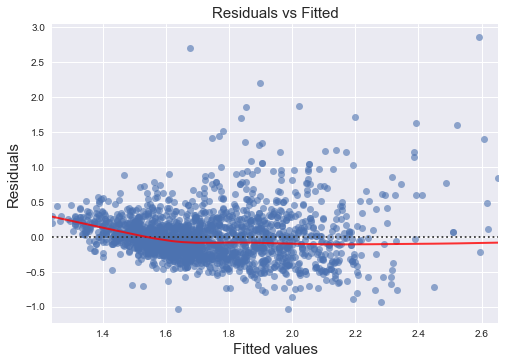

In [80]:
fig_1 = plt.figure(1)
fig_1.axes[0] = sns.residplot(data['yhat2'], data['price_sq'],
                                  lowess=True,
                                  scatter_kws={'alpha': 0.6},
                                  line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
fig_1.axes[0].set_title('Residuals vs Fitted')
fig_1.axes[0].set_xlabel('Fitted values')
fig_1.axes[0].set_ylabel('Residuals')


In [45]:
print(ols_1.aic)
print(ols_2.aic)

1440.8977774220457
1376.2440119045305
